In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865247 entries, 0 to 865246
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Trip ID                     865247 non-null  object 
 1   Taxi ID                     865246 non-null  object 
 2   Trip Start Timestamp        865247 non-null  object 
 3   Trip End Timestamp          865239 non-null  object 
 4   Trip Seconds                865078 non-null  float64
 5   Trip Miles                  865241 non-null  float64
 6   Pickup Census Tract         327251 non-null  float64
 7   Dropoff Census Tract        313854 non-null  float64
 8   Pickup Community Area       842052 non-null  float64
 9   Dropoff Community Area      781394 non-null  float64
 10  Fare                        863202 non-null  float64
 11  Tips                        863202 non-null  float64
 12  Tolls                       863202 non-null  float64
 13  Extras        

In [4]:
df = df[['Trip Miles','Trip Seconds','Fare']]
df.head()
df = df.dropna(subset=['Trip Miles','Trip Seconds', 'Fare'])
df['Speed'] = df['Trip Miles'] / (df['Trip Seconds'] / 3600)
df.to_csv('data_cleaned.csv', index=False)

In [98]:
trip_miles_threshold = df['Trip Miles'].quantile(0.99)
fare_threshold = df['Fare'].quantile(0.99)
speed_threshold = df['Speed'].quantile(0.99)
df = df[(df['Trip Miles'] <= trip_miles_threshold) & (df['Fare'] <= fare_threshold) & (df['Speed'] <= speed_threshold)]
df.describe()

,Trip Miles,Trip Seconds,Fare,Speed
count,800778.000000,800778.000000,800778.000000,800778.000000
mean,5.990569,1112.347977,20.027887,17.022006
std,6.041537,1449.391934,13.829316,12.234759
min,0.000000,1.000000,0.000000,0.000000
25%,0.960000,472.000000,8.000000,8.459300
50%,2.900000,894.000000,14.500000,13.583983
75%,11.160000,1543.000000,31.500000,25.573770
max,19.380000,86340.000000,51.000000,51.008310


In [108]:
X = df[['Trip Miles','Trip Seconds','Speed']]
y = df['Fare']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(640622, 3) (160156, 3) (640622,) (160156,)


In [109]:
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [110]:
y_pred = model.predict(X_test)
mean_squared_error_value = mean_squared_error(y_test, y_pred)
r2_score_value = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mean_squared_error_value}')
print(f'R^2 Score: {r2_score_value}')

Mean Squared Error: 37.974490737391605
R^2 Score: 0.8015673208507148


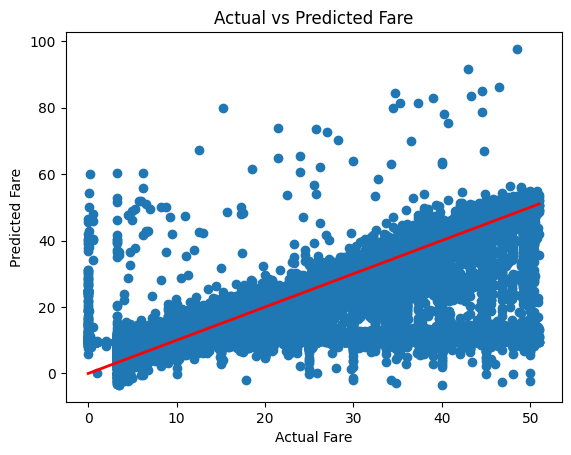

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # y=x line
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted Fare')
plt.show()